In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Market_Basket_Optimisation.csv')

data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [4]:
data.stack().value_counts()

mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

In [5]:
data.stack().value_counts(normalize=True)

mineral water    0.060900
eggs             0.045939
spaghetti        0.044508
french fries     0.043690
chocolate        0.041918
                   ...   
bramble          0.000477
cream            0.000239
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

<AxesSubplot: >

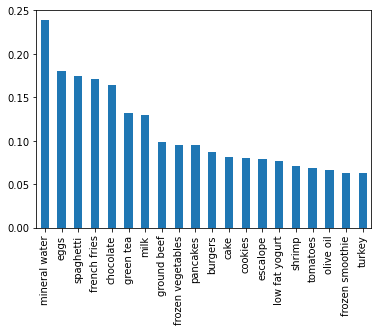

In [6]:
data.stack().value_counts().apply(lambda x: x / data.shape[0])[:20].plot(kind='bar')

<AxesSubplot: >

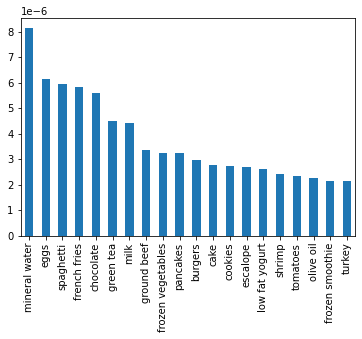

In [7]:
data.stack().value_counts(normalize=True).apply(lambda x: x / data.shape[0])[:20].plot(kind='bar')

In [8]:
import time

In [9]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

transactions[0]

['burgers', 'meatballs', 'eggs']

In [10]:
from apriori_python import apriori

t = []
start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.006, minConf=0.5)
t1 = time.perf_counter()-start
t.append(t1)

In [11]:
rules

[[{'ground beef', 'milk'}, {'mineral water'}, 0.503030303030303],
 [{'chocolate', 'olive oil'}, {'mineral water'}, 0.5040650406504065],
 [{'salmon', 'spaghetti'}, {'mineral water'}, 0.504950495049505],
 [{'eggs', 'ground beef'}, {'mineral water'}, 0.5066666666666667],
 [{'frozen vegetables', 'ground beef'}, {'spaghetti'}, 0.5118110236220472],
 [{'ground beef', 'pancakes'}, {'mineral water'}, 0.5137614678899083],
 [{'chicken', 'chocolate'}, {'mineral water'}, 0.5181818181818182],
 [{'ground beef', 'shrimp'}, {'spaghetti'}, 0.5232558139534884],
 [{'soup', 'spaghetti'}, {'mineral water'}, 0.5233644859813084],
 [{'milk', 'turkey'}, {'mineral water'}, 0.5411764705882353],
 [{'frozen vegetables', 'ground beef'}, {'mineral water'}, 0.5433070866141733],
 [{'cooking oil', 'eggs'}, {'mineral water'}, 0.5454545454545454],
 [{'milk', 'soup'}, {'mineral water'}, 0.5614035087719298],
 [{'frozen vegetables', 'olive oil'}, {'mineral water'}, 0.5764705882352941]]

In [12]:
from apyori import apriori

start = time.perf_counter()
rules = apriori(transactions=transactions,
               min_support=0.006,
               min_confidence=0.5,
               min_lift=1.001)

results = list(rules)
t2 = time.perf_counter() - start
t.append(t2)

In [13]:
results

[RelationRecord(items=frozenset({'chocolate', 'chicken', 'mineral water'}), support=0.0076, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate', 'chicken'}), items_add=frozenset({'mineral water'}), confidence=0.5181818181818182, lift=2.174797781960625)]),
 RelationRecord(items=frozenset({'chocolate', 'mineral water', 'olive oil'}), support=0.008266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate', 'olive oil'}), items_add=frozenset({'mineral water'}), confidence=0.5040650406504065, lift=2.115549974749887)]),
 RelationRecord(items=frozenset({'cooking oil', 'mineral water', 'eggs'}), support=0.0064, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cooking oil', 'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.5454545454545455, lift=2.2892608231164475)]),
 RelationRecord(items=frozenset({'eggs', 'mineral water', 'ground beef'}), support=0.010133333333333333, ordered_statistics=[OrderedStatistic(items_base=froze

In [14]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print(f'Support: {result[1]}, Confidence: {subset[2]}, Lift: {subset[3]}')
        print()

frozenset({'chocolate', 'chicken'}) frozenset({'mineral water'})
Support: 0.0076, Confidence: 0.5181818181818182, Lift: 2.174797781960625

frozenset({'chocolate', 'olive oil'}) frozenset({'mineral water'})
Support: 0.008266666666666667, Confidence: 0.5040650406504065, Lift: 2.115549974749887

frozenset({'cooking oil', 'eggs'}) frozenset({'mineral water'})
Support: 0.0064, Confidence: 0.5454545454545455, Lift: 2.2892608231164475

frozenset({'eggs', 'ground beef'}) frozenset({'mineral water'})
Support: 0.010133333333333333, Confidence: 0.5066666666666666, Lift: 2.1264689423614995

frozenset({'frozen vegetables', 'ground beef'}) frozenset({'mineral water'})
Support: 0.0092, Confidence: 0.5433070866141732, Lift: 2.2802479852301616

frozenset({'frozen vegetables', 'ground beef'}) frozenset({'spaghetti'})
Support: 0.008666666666666666, Confidence: 0.5118110236220472, Lift: 2.939190411305784

frozenset({'frozen vegetables', 'olive oil'}) frozenset({'mineral water'})
Support: 0.006533333333333

In [15]:
from efficient_apriori import apriori

start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.006, min_confidence=0.5)
t3 = time.perf_counter() - start
t.append(t3)

for i in range(len(rules)):
    print(rules[i])

{chicken, chocolate} -> {mineral water} (conf: 0.518, supp: 0.008, lift: 2.175, conv: 1.581)
{chocolate, olive oil} -> {mineral water} (conf: 0.504, supp: 0.008, lift: 2.116, conv: 1.536)
{cooking oil, eggs} -> {mineral water} (conf: 0.545, supp: 0.006, lift: 2.289, conv: 1.676)
{eggs, ground beef} -> {mineral water} (conf: 0.507, supp: 0.010, lift: 2.126, conv: 1.544)
{frozen vegetables, ground beef} -> {mineral water} (conf: 0.543, supp: 0.009, lift: 2.280, conv: 1.668)
{frozen vegetables, ground beef} -> {spaghetti} (conf: 0.512, supp: 0.009, lift: 2.939, conv: 1.692)
{frozen vegetables, olive oil} -> {mineral water} (conf: 0.576, supp: 0.007, lift: 2.419, conv: 1.799)
{ground beef, milk} -> {mineral water} (conf: 0.503, supp: 0.011, lift: 2.111, conv: 1.533)
{ground beef, pancakes} -> {mineral water} (conf: 0.514, supp: 0.007, lift: 2.156, conv: 1.567)
{ground beef, shrimp} -> {spaghetti} (conf: 0.523, supp: 0.006, lift: 3.005, conv: 1.732)
{milk, olive oil} -> {mineral water} (con

In [16]:
from fpgrowth_py import fpgrowth

start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.006, minConf=0.5)
t4 = time.perf_counter() - start
t.append(t4)

for i in range(len(rules)):
    print(rules[i])

[{'salmon', 'spaghetti'}, {'mineral water'}, 0.504950495049505]
[{'spaghetti', 'soup'}, {'mineral water'}, 0.5233644859813084]
[{'milk', 'soup'}, {'mineral water'}, 0.5614035087719298]
[{'cooking oil', 'eggs'}, {'mineral water'}, 0.5454545454545454]
[{'chocolate', 'chicken'}, {'mineral water'}, 0.5181818181818182]
[{'milk', 'turkey'}, {'mineral water'}, 0.5411764705882353]
[{'frozen vegetables', 'olive oil'}, {'mineral water'}, 0.5764705882352941]
[{'chocolate', 'olive oil'}, {'mineral water'}, 0.5040650406504065]
[{'shrimp', 'ground beef'}, {'spaghetti'}, 0.5232558139534884]
[{'pancakes', 'ground beef'}, {'mineral water'}, 0.5137614678899083]
[{'frozen vegetables', 'ground beef'}, {'spaghetti'}, 0.5118110236220472]
[{'frozen vegetables', 'ground beef'}, {'mineral water'}, 0.5433070866141733]
[{'eggs', 'ground beef'}, {'mineral water'}, 0.5066666666666667]
[{'milk', 'ground beef'}, {'mineral water'}, 0.503030303030303]


apriori_python: 12.364667499998177
apyori: 0.1453825999997207
efficient_apriori: 0.08386780000000726
fpgrowth_py: 5.359959500005061


<BarContainer object of 4 artists>

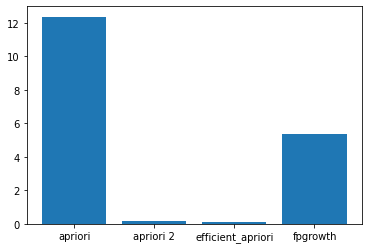

In [17]:
print(f'apriori_python: {t[0]}')
print(f'apyori: {t[1]}')
print(f'efficient_apriori: {t[2]}')
print(f'fpgrowth_py: {t[3]}')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)

In [18]:
data = pd.read_csv('data.csv')

data.head()

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


In [20]:
data.stack().value_counts()

Coffee              5471
Bread               3324
Tea                 1435
Cake                1025
Pastry               856
                    ... 
Olum & polenta         1
Gift voucher           1
Coffee granules        1
Raw bars               1
Chicken sand           1
Length: 102, dtype: int64

In [21]:
data.stack().value_counts(normalize=True)

Coffee              0.266800
Bread               0.162099
Tea                 0.069980
Cake                0.049985
Pastry              0.041744
                      ...   
Olum & polenta      0.000049
Gift voucher        0.000049
Coffee granules     0.000049
Raw bars            0.000049
Chicken sand        0.000049
Length: 102, dtype: float64

<AxesSubplot: >

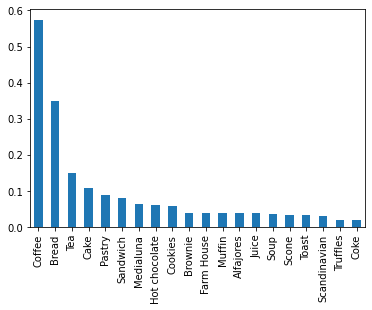

In [22]:
data.stack().value_counts().apply(lambda x: x / data.shape[0])[:20].plot(kind='bar')

<AxesSubplot: >

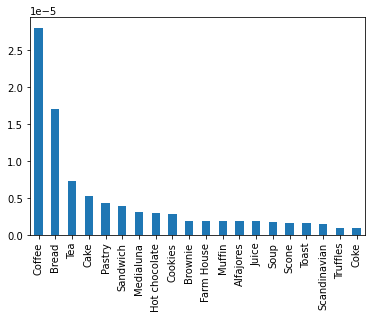

In [23]:
data.stack().value_counts(normalize=True).apply(lambda x: x / data.shape[0])[:20].plot(kind='bar')

In [24]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

transactions[0]

['Scandinavian', 'Scandinavian']

In [25]:
from apriori_python import apriori

t = []
start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.02, minConf=0.5)
t1 = time.perf_counter()-start
t.append(t1)

In [26]:
rules

[[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Juice'}, {'Coffee'}, 0.5342465753424658],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692],
 [{'Toast'}, {'Coffee'}, 0.7044025157232704]]

In [27]:
from apyori import apriori

start = time.perf_counter()
rules = apriori(transactions=transactions,
               min_support=0.02,
               min_confidence=0.5,
               min_lift=1.001)

results = list(rules)
t2 = time.perf_counter() - start
t.append(t2)

In [28]:
results

[RelationRecord(items=frozenset({'Cake', 'Coffee'}), support=0.05435466946484785, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cake'}), items_add=frozenset({'Coffee'}), confidence=0.5269582909460834, lift=1.109079618532724)]),
 RelationRecord(items=frozenset({'Cookies', 'Coffee'}), support=0.02801678908709339, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cookies'}), items_add=frozenset({'Coffee'}), confidence=0.5184466019417475, lift=1.0911652200761603)]),
 RelationRecord(items=frozenset({'Hot chocolate', 'Coffee'}), support=0.02938090241343127, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Hot chocolate'}), items_add=frozenset({'Coffee'}), confidence=0.5072463768115942, lift=1.0675923080862397)]),
 RelationRecord(items=frozenset({'Juice', 'Coffee'}), support=0.020461699895068207, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Juice'}), items_add=frozenset({'Coffee'}), confidence=0.5342465753424658, lift=1.124419139358149)]),
 Re

In [29]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print(f'Support: {result[1]}, Confidence: {subset[2]}, Lift: {subset[3]}')
        print()

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785, Confidence: 0.5269582909460834, Lift: 1.109079618532724

frozenset({'Cookies'}) frozenset({'Coffee'})
Support: 0.02801678908709339, Confidence: 0.5184466019417475, Lift: 1.0911652200761603

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Support: 0.02938090241343127, Confidence: 0.5072463768115942, Lift: 1.0675923080862397

frozenset({'Juice'}) frozenset({'Coffee'})
Support: 0.020461699895068207, Confidence: 0.5342465753424658, Lift: 1.124419139358149

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116475, Confidence: 0.5692307692307693, Lift: 1.1980497417776572

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574, Confidence: 0.5521472392638037, Lift: 1.162094344121919

frozenset({'Sandwich'}) frozenset({'Coffee'})
Support: 0.037985309548793283, Confidence: 0.5323529411764706, Lift: 1.1204336416545417

frozenset({'Toast'}) frozenset({'Coffee'})
Support: 0.0235047219307

In [30]:
from efficient_apriori import apriori

start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.02, min_confidence=0.5)
t3 = time.perf_counter() - start
t.append(t3)

for i in range(len(rules)):
    print(rules[i])

{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Juice} -> {Coffee} (conf: 0.534, supp: 0.020, lift: 1.124, conv: 1.127)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.483, conv: 1.776)


In [31]:
from fpgrowth_py import fpgrowth

start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.02, minConf=0.5)
t4 = time.perf_counter() - start
t.append(t4)

for i in range(len(rules)):
    print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]


apriori_python: 0.4894012000004295
apyori: 0.008538699999917299
efficient_apriori: 0.0075626999969244935
fpgrowth_py: 0.25517089999630116


<BarContainer object of 4 artists>

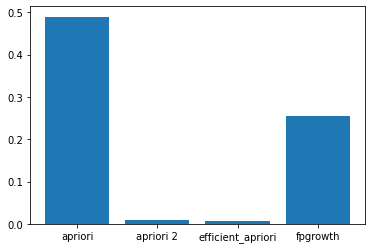

In [32]:
print(f'apriori_python: {t[0]}')
print(f'apyori: {t[1]}')
print(f'efficient_apriori: {t[2]}')
print(f'fpgrowth_py: {t[3]}')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)